In [136]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import skimage
import skimage.io as io
import os 
from skimage.color import rgb2gray,rgb2hsv,hsv2rgb
from skimage.exposure import histogram


In [12]:
img = skimage.io.imread("Face_Dataset/Ground_Truth/GroundT_FacePhoto/06Apr03Face.png")[:,:,:3]

In [13]:
img2 = skimage.io.imread("Face_Dataset/Pratheepan_Dataset/FacePhoto/06Apr03Face.jpg")

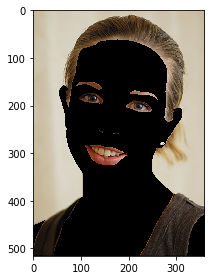

In [35]:
io.imshow((1-(img/255))*img2)

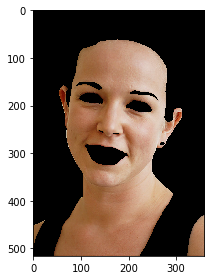

In [36]:
io.imshow((img/255)*img2)

In [112]:
skinHisto = np.zeros((256,256,256,1))
nonskinHisto = np.zeros((256,256,256,1))

In [113]:
grPath = "Face_Dataset/Ground_Truth/"
imgPath = "Face_Dataset/Pratheepan_Dataset/"
for name in os.listdir(grPath):
    if name[-4:] == '.png':
        grI = io.imread(grPath+name)[:,:,:3] #3 to delete the fourth dimention on png files
        img = io.imread(imgPath+name[:-4]+'.jpg') 
        
        skinImg = rgb2hsv((grI/255)*img)
        nonSkinImg = rgb2hsv((1-(grI/255))*img)
        
        for i in range(skinImg.shape[0]):
            for j in range(skinImg.shape[1]):
                if np.sum( skinImg[i,j] != [0., 0., 0.]):
                    t = np.array(skinImg[i,j]*255,dtype=int)
                    skinHisto[t[0],t[1],t[2]] +=1

        for i in range(nonSkinImg.shape[0]):
            for j in range(nonSkinImg.shape[1]):
                if np.sum( nonSkinImg[i,j] != [0., 0., 0.]):
                    t = np.array(nonSkinImg[i,j]*255,dtype=int)
                    nonskinHisto[t[0],t[1],t[2]] +=1

0.0

In [125]:
cap = cv2.VideoCapture(0)
ret_val, lastImg = cap.read()
i = 0
while True:
    ret_val, img = cap.read()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    if ret_val:
        img = cv2.flip(img, 1)
        edges = cv2.Canny(img,75,200)

        cv2.imshow('my webcam', edges)
        if cv2.waitKey(1) == 27: 
            break  # esc to quit
cap.release()
cv2.destroyAllWindows()


In [127]:
img.shape

(720, 1280, 3)

246424


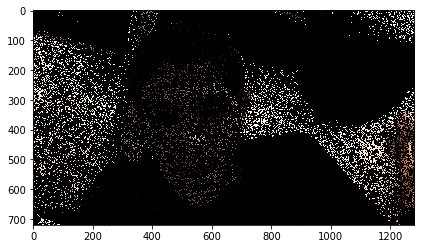

In [199]:
threshold = 0.0125
newImg = hsv2rgb(img.copy())
Tskin = np.sum(skinHisto)
Tnon = np.sum(nonskinHisto)
k =0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        t = np.array(img[i,j],dtype=int)
        pskin = skinHisto[t[0],t[1],t[2]] *1.0 / Tskin
        pnon = nonskinHisto[t[0],t[1],t[2]] *1.0 / Tnon 

        if pskin == 0:
            
            newImg[i,j] = 0

        
        if pnon == 0:
            continue 

        if pskin / pnon < threshold:
            k+=1
            newImg[i,j] = 0
print k            
io.imshow(newImg)

In [159]:
nonskinHisto[t[0],t[1],t[2]] * 1.0 / skinHisto[t[0],t[1],t[2]]

array([0.])